## Use barcharts and heatmaps to visualize patterns in your data
IGN Game Reviews provide scores from experts for the most recent game releases, ranging from 0 (Disaster) to 10 (Masterpiece).
<img src="https://i.imgur.com/Oh06Fu1.png">




## Load the data
1. Read the IGN data file into a dataframe named `ign_scores`.  
2. Use the `"Platform"` column to label the rows.

In [ ]:
import pandas as pd

# URL of the dataset
IGN = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/ign_scores.csv"

# Read the IGN data file into a dataframe named ign_scores
ign_scores = pd.read_csv(IGN)

# Inspect the first few rows to check for misalignment
print(ign_scores.head())

# If the 'Platform' column is misaligned, we can manually adjust the header
if 'Platform' not in ign_scores.columns:
    # Shift the header row to the correct position
    ign_scores.columns = ign_scores.iloc[0]
    ign_scores = ign_scores[1:]

    # Reset the index to ensure it starts from 0
    ign_scores.reset_index(drop=True, inplace=True)

    # Rename the columns to remove any potential issues with leading/trailing spaces
    ign_scores.columns = ign_scores.columns.str.strip()




           Platform    Action  Action, Adventure  Adventure  Fighting  \
0         Dreamcast  6.882857           7.511111   6.281818  8.200000   
1  Game Boy Advance  6.373077           7.507692   6.057143  6.226316   
2    Game Boy Color  6.272727           8.166667   5.307692  4.500000   
3          GameCube  6.532584           7.608333   6.753846  7.422222   
4      Nintendo 3DS  6.670833           7.481818   7.414286  6.614286   

   Platformer    Puzzle       RPG    Racing   Shooter  Simulation    Sports  \
0    8.340000  8.088889  7.700000  7.042500  7.616667    7.628571  7.272222   
1    6.970588  6.532143  7.542857  6.657143  6.444444    6.928571  6.694444   
2    6.352941  6.583333  7.285714  5.897436  4.500000    5.900000  5.790698   
3    6.665714  6.133333  7.890909  6.852632  6.981818    8.028571  7.481319   
4    7.503448  8.000000  7.719231  6.900000  7.033333    7.700000  6.388889   

   Strategy  
0  6.433333  
1  7.175000  
2  7.400000  
3  7.116667  
4  7.900000  
Th

## Problem 1 - (1 point)
Use the dataframe ign_scores and write one line of code to determine the highest score received by any kind of games on the Wii platform?

In [35]:

# Now, determine the highest score across all columns for games on the Wii platform
highest_wii_score = ign_scores[ign_scores['Platform'] == 'Wii'].drop(columns=['Platform']).max().max()
print("The highest score across all columns for games on the Wii platform is:", highest_wii_score)

The highest score across all columns for games on the Wii platform is: 7.410344827586206


## Problem 2 - (1 point)
Use the dataframe `ign_scores` to determine which genre has the lowest score for the `PlayStation Vita` platform.

In [37]:
# Filter the dataframe to include only rows where the 'Platform' is 'PlayStation Vita'
ps_vita_scores = ign_scores[ign_scores['Platform'] == 'PlayStation Vita']

# Find the minimum score for each genre
min_scores = ps_vita_scores.drop(columns=['Platform']).min()

lowest_score_value = min_scores.min()

print("The lowest score value for games on the PlayStation Vita is:", lowest_score_value)

The lowest score value for games on the PlayStation Vita is: 5.725


## Problem 3 -  (2 points)
Your instructor's favorite video game has been Mario Kart Wii, a racing game released for the Wii platform in 2008. And, IGN agrees with her that it is a great game -- their rating for this game is a whopping 8.9! Inspired by the success of this game, your instructor is considering creating your very own racing game for the Wii platform. Perform the following analyses to help her determine which platform she should focus on.

1. Create a bar chart that shows the score for *Racing* games, for each platform. Your chart should have one bar for each platform. Provide a meaningful title to the plot.

2. Based on the bar chart, do you expect a racing game for the **Wii** platform to receive a high rating?  If not, use the pandas to find out from the dataframe `ign_scores` which gaming platform is the best for racing game?

C:\Users\Aaron\AppData\Local\Temp\ipykernel_18696\2664664404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Platform', y='Racing', data=racing_scores, palette='viridis')


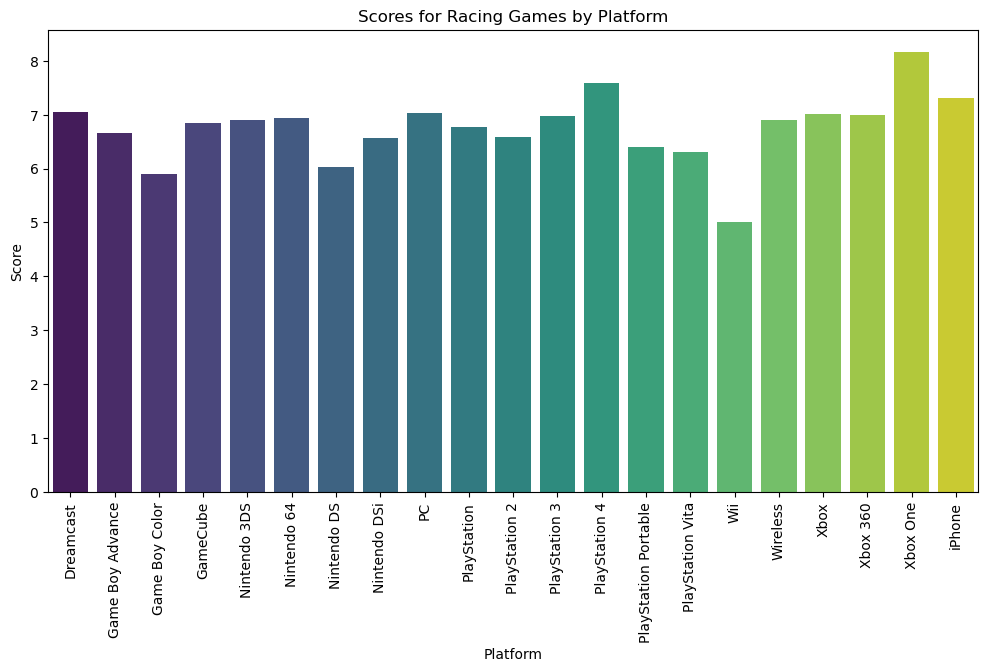

In [38]:

# Filter the dataframe to include only the 'Racing' genre
racing_scores = ign_scores[['Platform', 'Racing']].dropna()

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Platform', y='Racing', data=racing_scores, palette='viridis')
plt.title('Scores for Racing Games by Platform')
plt.xlabel('Platform')
plt.ylabel('Score')
plt.xticks(rotation=90)
plt.show()

In [40]:
# Find the platform with the highest average score for racing games
best_platform_for_racing = racing_scores.groupby('Platform')['Racing'].mean().idxmax()
highest_average_score = racing_scores.groupby('Platform')['Racing'].mean().max()

print(f"The best gaming platform for racing games is '{best_platform_for_racing}' with an average score of {highest_average_score:.2f}.")


The best gaming platform for racing games is 'Xbox One' with an average score of 8.16.


#### Problem 4 - (2 points)
Since your instructor's gaming interests are pretty broad, you can help her decide to use the IGN scores to determine the choice of genre and platform.

1. Create a heatmap using the IGN scores by genre and platform and include the scores in the cells of the heatmap.
2. Base on the heatmap, which combination of genre and platform receives the highest average ratings?  Which combination receives the lowest average rankings? Write the answers in a markdown cell.

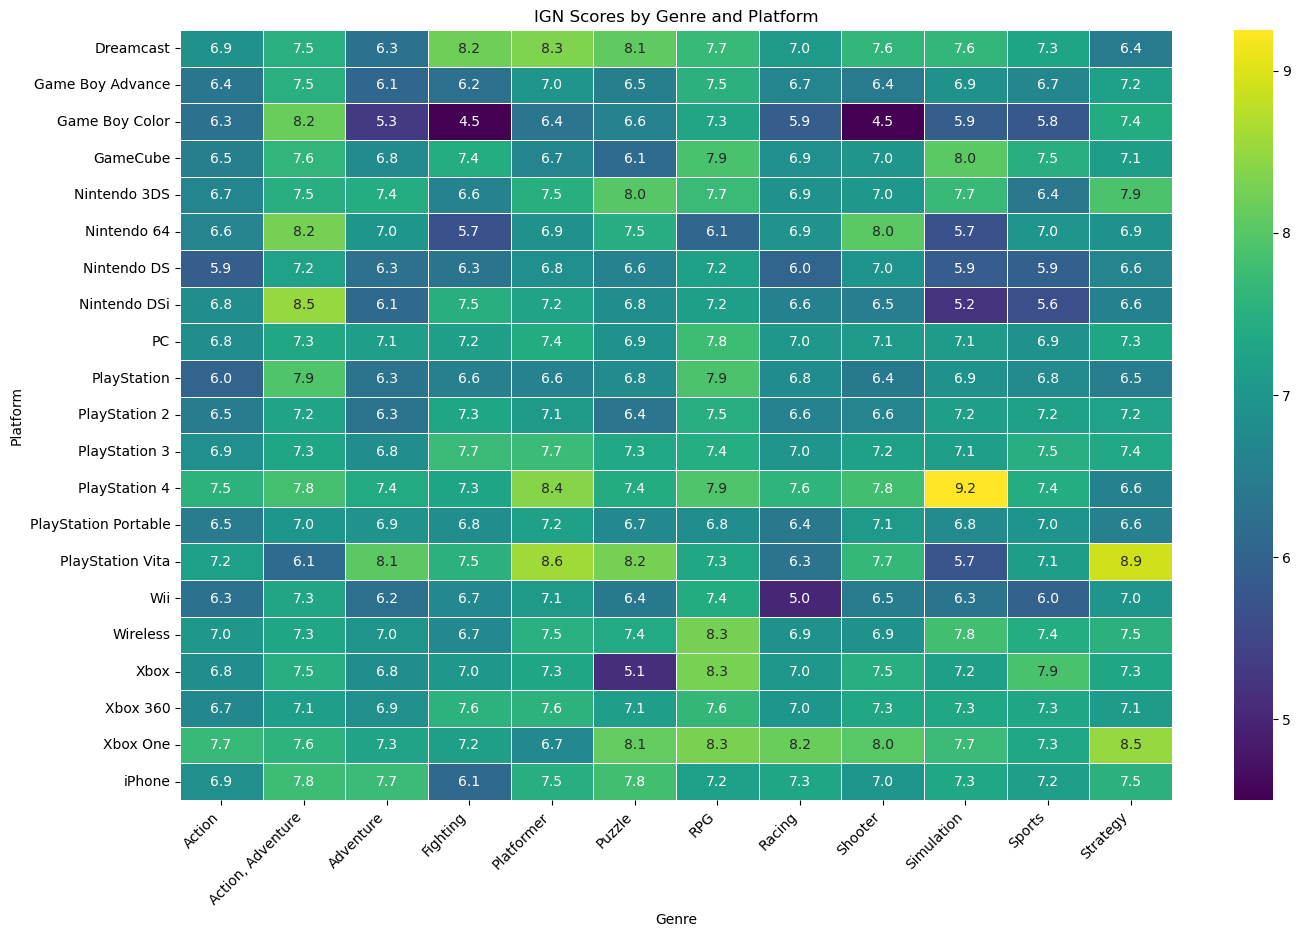

In [41]:

# Pivot the dataframe to create a matrix with platforms as rows and genres as columns
pivot_table = ign_scores.pivot_table(index='Platform', aggfunc='mean')

# Create a heatmap
plt.figure(figsize=(16, 10))
heatmap = sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="viridis", linewidths=.5)
plt.title('IGN Scores by Genre and Platform')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.show()

The Highest was PlayStation 4 and Simulation. The Lowest was the Game Boy Color for two categories. Shooter and Fighting were tied for the lowest.

## Problem 5 - (4 points)
Use the Pokemon dataset to create a clustermap with color. First, filter the dataframe to only keep data with `Type 1` equals to following values: `Water`, `Normal`, `Grass`, `Bug` and `Psychic`. Annotate the dendrogram using different colors for these five different `Type 1` values. Use `Name` as the index.

pokemon_data is in https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv

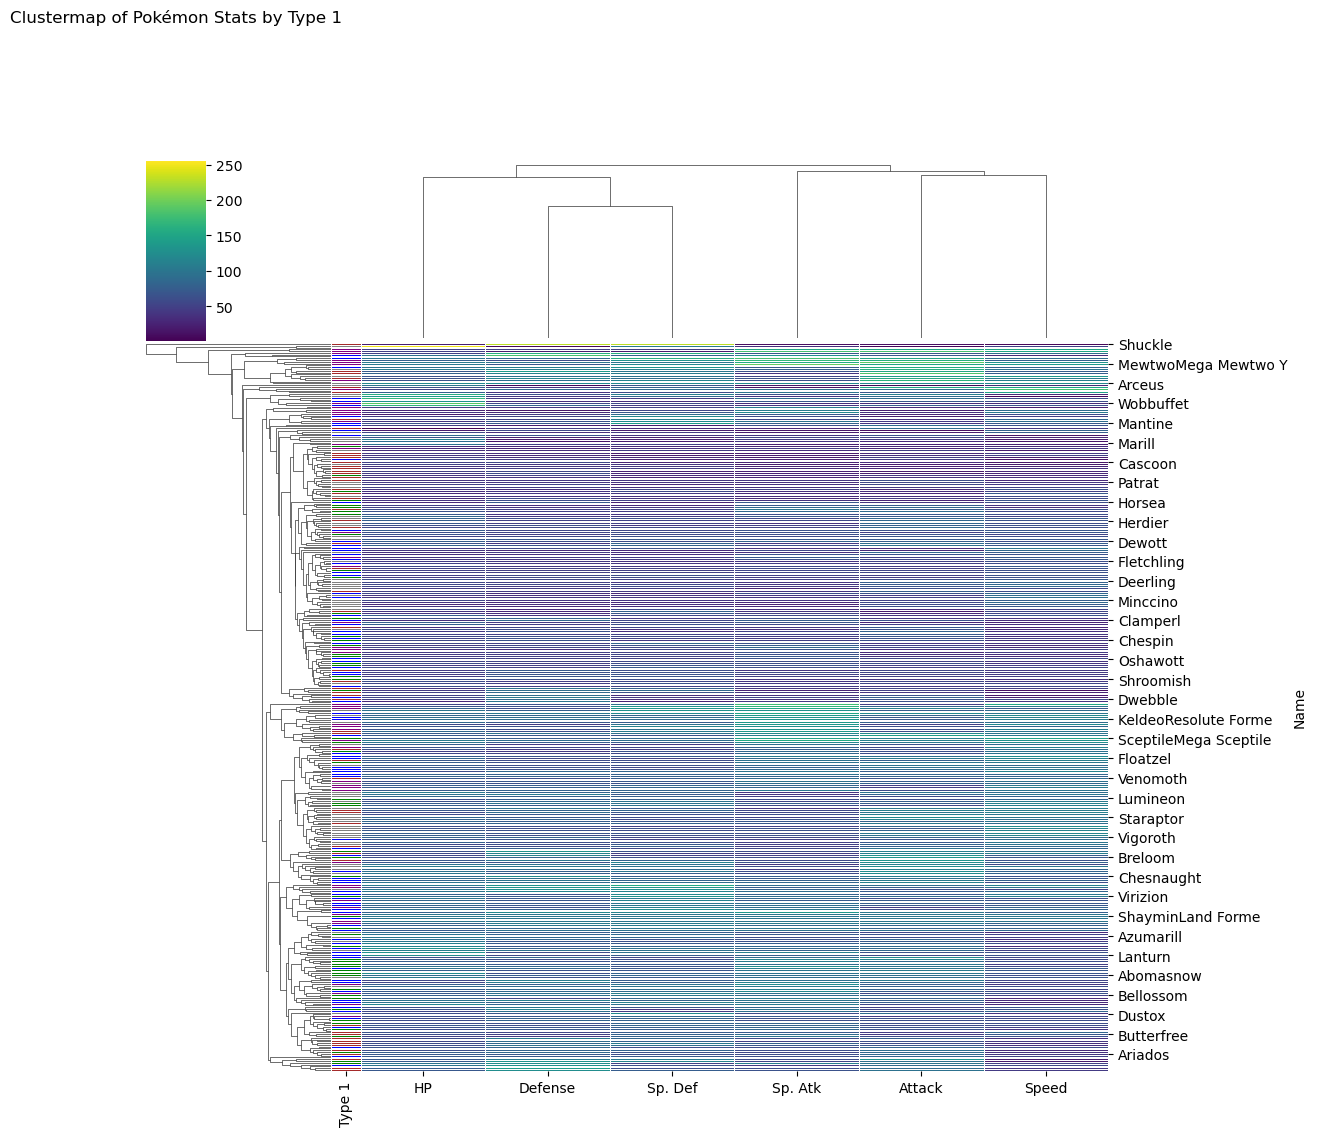

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# URL of the dataset
url = "https://raw.githubusercontent.com/csbfx/advpy122-data/master/Pokemon.csv"

# Read the dataset into a dataframe
df = pd.read_csv(url)

# Filter the dataframe to only keep data with `Type 1` equal to `Water`, `Normal`, `Grass`, `Bug`, and `Psychic`
filtered_df = df[df['Type 1'].isin(['Water', 'Normal', 'Grass', 'Bug', 'Psychic'])]

# Use `Name` as the index
filtered_df.set_index('Name', inplace=True)

# Select relevant columns for clustering
clustering_data = filtered_df[['HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed']]

# Create a color palette for the `Type 1` values
type1_palette = {
    'Water': 'blue',
    'Normal': 'gray',
    'Grass': 'green',
    'Bug': 'brown',
    'Psychic': 'purple'
}

# Create a list of colors for the `Type 1` values
row_colors = filtered_df['Type 1'].map(type1_palette)

# Create the clustermap
sns.clustermap(clustering_data, row_colors=row_colors, cmap='viridis', linewidths=.5, figsize=(12, 10))

# Add a title to the plot
plt.title('Clustermap of Pokémon Stats by Type 1', pad=100)

# Show the plot
plt.show()